In [1]:
import os
%cd /content/drive/MyDrive/DepressionDetection/depression_detection
print("Current working directory:", os.getcwd())

/content/drive/MyDrive/DepressionDetection/depression_detection
Current working directory: /content/drive/MyDrive/DepressionDetection/depression_detection


In [2]:
from depression_detection.generator import IDAIC_Data_Generator

DATA_PATH = "/content/drive/MyDrive/DepressionDetection/depression_detection/IDAIC_dataset/data_depression_detection"

train_data = IDAIC_Data_Generator(DATA_PATH,
                        output_format='text',
                        batch_size=1,
                        shuffle=False,
                        split="train",
                        seed=None,
                        prompt_maker = None
                        )

dev_data = IDAIC_Data_Generator(DATA_PATH,
                        output_format='text',
                        batch_size=1,
                        shuffle=False,
                        split="dev",
                  x      seed=None,
                        prompt_maker = None
                        )

test_data = IDAIC_Data_Generator(DATA_PATH,
                        output_format='text',
                        batch_size=1,
                        shuffle=False,
                        split="test",
                        seed=None,
                        prompt_maker = None
                        )

In [3]:
for sample in train_data:
    conversation, label = sample
    print('Conversation:', conversation)
    print('Label:', label)
    break

Conversation: ["\n        i'm great thanks where are you from originally. here in california. really. yeah. what are some things you really like about l_a . oh well that it's big and broad there's a lot to do a lot of um um job opportunities than other states um pretty much that it's big and there's a lot you can do here. yeah what are some things you don't really like about l_a. traffic um maybe the violence rate bad news even though you know you wanna know what's going on in your environment but you still have to watch it so you can you know look out to see what's going on on a daily basis. mhm what'd you study at school. sociology i have a um two year degree in liberal arts but my major was sociology. nice are you still working in that. no i'm actually an m_t_a bus operator. what's your dream job. well since metro is steady growing um my dream job is to move up in the company and i'm about to actually start some classes for supervisory next week so um 'cause they look to promote wit

In [4]:
x_train = [item for sample in train_data for item in sample[0]]
y_train = [item for sample in train_data for item in sample[1]]

x_dev = [item for sample in dev_data for item in sample[0]]
y_dev = [item for sample in dev_data for item in sample[1]]

x_test = [item for sample in test_data for item in sample[0]]
y_test = [item for sample in test_data for item in sample[1]]


In [5]:
for record in x_test:
  print(record)
  break

for label in y_train:
  print(label)
  break


        that's good where are you from originally. atlanta georgia. really why'd you move to l_a. um my parents are from here um. how do you like l_a. i love it. what are some things you really like about l_a. i like the weather i like the opportunities um yes. how easy was it for you to get used to living in l_a. um it took a minute somewhat easy. what are some things you don't really like about l_a. congestion. mhm. that's it. okay what'd you study at school. um i took up business and administration. cool are you still doing that. uh yeah i am here and there i'm on a break right now but i plan on going back in the uh next semester. what's your dream job. uh probably to open up my own business. awesome do you travel a lot. no. why. um no specific reason i just don't travel a lot i'm pretty local. okay how often do you go back to your hometown. once a year. nice do you consider yourself an introvert. can you be a little bit more specific. whatever comes to your mind. no answer. okay  

## **Statistics of the Dataset**

In [6]:
def calculate_lengths(x_data, data_name):
    avg_words = sum(len(record.split()) for record in x_data) / len(x_data)
    min_words = min(len(record.split()) for record in x_data)
    max_words = max(len(record.split()) for record in x_data)

    avg_sentences = sum(len(record.split('. ')) for record in x_data) / len(x_data)
    min_sentences = min(len(record.split('. ')) for record in x_data)
    max_sentences = max(len(record.split('. ')) for record in x_data)

    return {
        "Dataset Name": data_name,
        'Avg Words': avg_words,
        'Min Words': min_words,
        'Max Words': max_words,
        'Avg Sentences': avg_sentences,
        'Min Sentences': min_sentences,
        'Max Sentences': max_sentences,
    }

# Calculate statistics for train, test, and dev sets
train_stats = calculate_lengths(x_train, 'Train')
test_stats = calculate_lengths(x_test, 'Test')
dev_stats = calculate_lengths(x_dev, 'Dev')

# Create a DataFrame to display the statistics in a table
import pandas as pd

stats_table = pd.DataFrame([train_stats, test_stats, dev_stats])
print(stats_table.to_markdown())


|    | Dataset Name   |   Avg Words |   Min Words |   Max Words |   Avg Sentences |   Min Sentences |   Max Sentences |
|---:|:---------------|------------:|------------:|------------:|----------------:|----------------:|----------------:|
|  0 | Train          |     1116.04 |           9 |        4622 |         69.3233 |               1 |             209 |
|  1 | Test           |     1360.71 |           0 |        5011 |         91.9328 |               1 |             196 |
|  2 | Dev            |     1257.94 |           0 |        3440 |         84.1111 |               1 |             204 |


In [7]:
def check_labels(y):
  zeros=0
  ones=0
  for i in y:
      if i==0:
          zeros=zeros+1
      if i==1:
          ones=ones+1
  return {'Zeros': zeros, 'Ones': ones}


# Check labels for train, test, and dev sets
labels_train = check_labels(y_train)
labels_dev = check_labels(y_dev)
labels_test = check_labels(y_test)

# Create a DataFrame for better presentation
labels_table = pd.DataFrame([labels_train, labels_dev, labels_test], index=['Train', 'Dev', 'Test'])
print(labels_table.to_markdown())

|       |   Zeros |   Ones |
|:------|--------:|-------:|
| Train |     308 |     91 |
| Dev   |      81 |     27 |
| Test  |      85 |     34 |


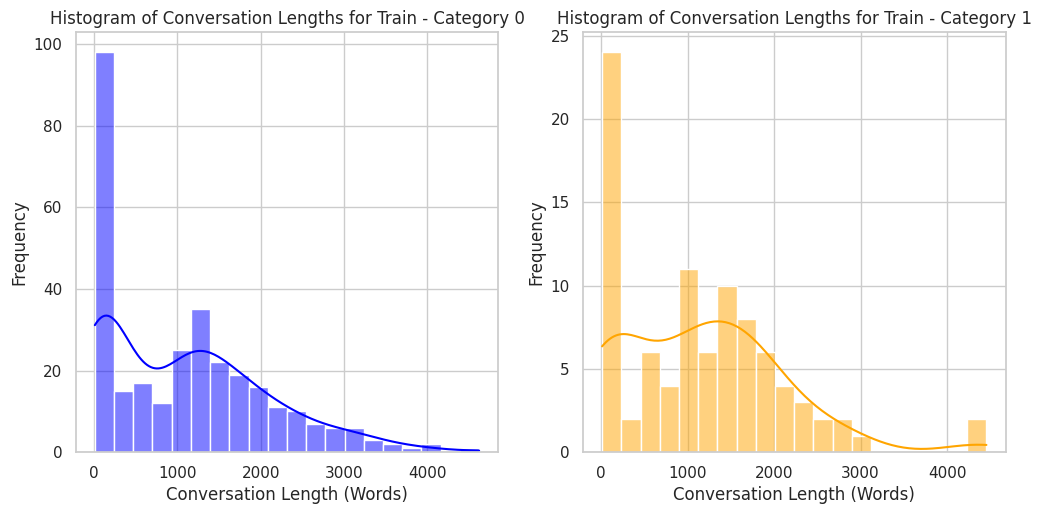

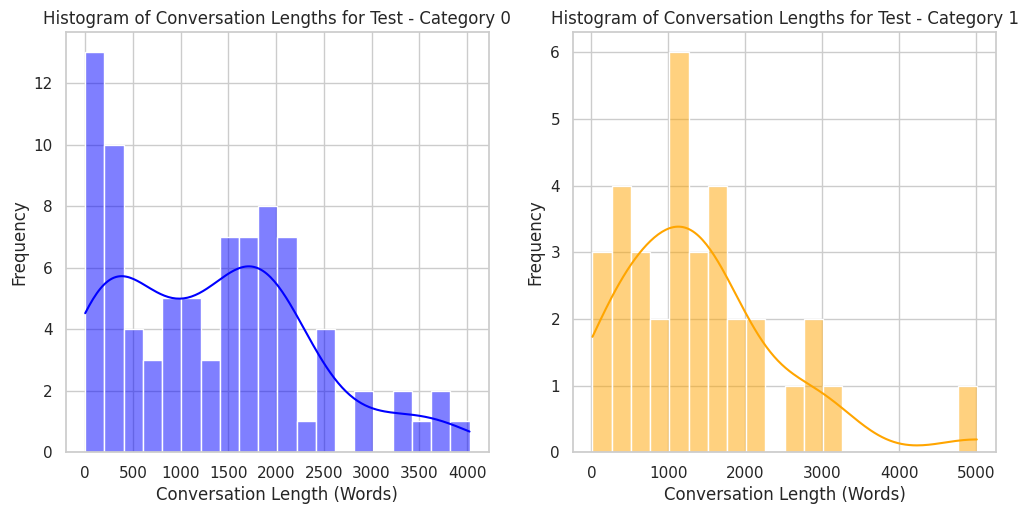

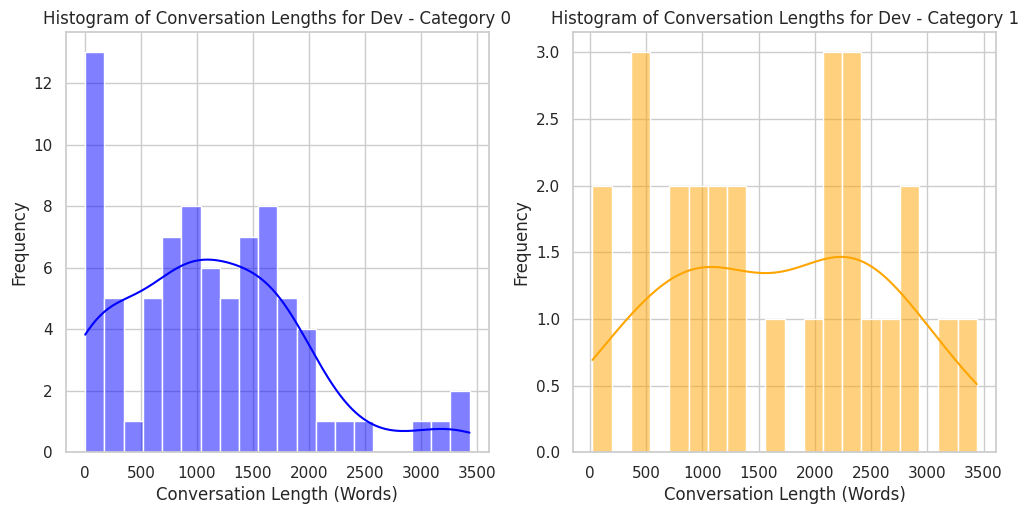

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conversation_lengths(x_data, y_data, dataset_name):
    conversation_lengths = [len(conversation.split()) for conversation in x_data]

    conversation_lengths_category0 = [length for length, label in zip(conversation_lengths, y_data) if label == 0]
    conversation_lengths_category1 = [length for length, label in zip(conversation_lengths, y_data) if label == 1]

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 12))

    # Histogram for Category 0
    plt.subplot(2, 2, 1)
    sns.histplot(conversation_lengths_category0, bins=20, kde=True, color='blue')
    plt.xlabel('Conversation Length (Words)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Conversation Lengths for {dataset_name} - Category 0')

    # Histogram for Category 1
    plt.subplot(2, 2, 2)
    sns.histplot(conversation_lengths_category1, bins=20, kde=True, color='orange')
    plt.xlabel('Conversation Length (Words)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Conversation Lengths for {dataset_name} - Category 1')

    plt.show()

plot_conversation_lengths(x_train, y_train, 'Train')
plot_conversation_lengths(x_test, y_test, 'Test')
plot_conversation_lengths(x_dev, y_dev, 'Dev')



## **Baseline Models**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

print("Preprocessing training data...")
train_preprocessed = preprocessing.fit_transform(x_train)

print("Preprocessing test data...")
dev_preprocessed = preprocessing.transform(x_dev)
test_preprocessed = preprocessing.transform(x_test)
print("Training data shape:", train_preprocessed.shape)
print("Test data shape:", test_preprocessed.shape)

Preprocessing training data...
Preprocessing test data...
Training data shape: (399, 9672)
Test data shape: (119, 9672)


In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
lr_classifier = LogisticRegression(multi_class="ovr")

print("Training SVM classifier...")
svm_classifier.fit(train_preprocessed, y_train)

print("Training Logistic Regression classifier...")
lr_classifier.fit(train_preprocessed, y_train)

parameters = {'C': np.logspace(0, 3, 10)}
parameters = {'C': [0.1, 1, 10, 100, 1000]}

svm_best = GridSearchCV(svm_classifier, parameters, cv=3, verbose=1)
svm_best.fit(train_preprocessed, y_train)

lr_best = GridSearchCV(lr_classifier, parameters, cv=3, verbose=1)
lr_best.fit(train_preprocessed, y_train)

print("Best SVM Parameters")
print(svm_best.best_params_)
print("Best LR parameters:")
print(lr_best.best_params_)

Training SVM classifier...
Training Logistic Regression classifier...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best SVM Parameters
{'C': 10}
Best LR parameters:
{'C': 100}


In [32]:
import torch.nn.functional as F
import torch

def calculate_kl_divergence(y_prob, y_true):
    log_p = F.log_softmax(torch.from_numpy(y_prob), dim=1)
    y_true_np = np.array(y_true)
    q = F.one_hot(torch.from_numpy(y_true_np), num_classes=2).float()
    q = F.softmax(q, dim=1)
    kl_div_loss = F.kl_div(log_p, q, reduction='mean')

    return kl_div_loss.item()

def plot_class_probabilities(y_prob, y_true):
    # Extract class probabilities for class 1
    class_probabilities = y_prob[:, 1]

    # Ensure y_true is a 1D array
    y_true = np.squeeze(y_true)

    # Split class probabilities based on true labels
    class_0_probabilities = class_probabilities[y_true == 0]
    class_1_probabilities = class_probabilities[y_true == 1]

    # Set the colors for the bars
    colors_class_0 = 'steelblue'
    colors_class_1 = 'coral'

    # Plot histogram
    plt.hist([class_0_probabilities, class_1_probabilities],
             color=[colors_class_0, colors_class_1],
             label=['Non-Depression', 'Depression'],
            )

    # Set labels and title
    plt.xlabel("Probability", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.title("Histogram of Class Probabilities", fontsize=16)

    # Increase the text size of x and y axis numbers
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        85
           1       0.92      0.35      0.51        34

    accuracy                           0.81       119
   macro avg       0.86      0.67      0.70       119
weighted avg       0.83      0.81      0.77       119

KL Divergence Score:  0.03570921048934115


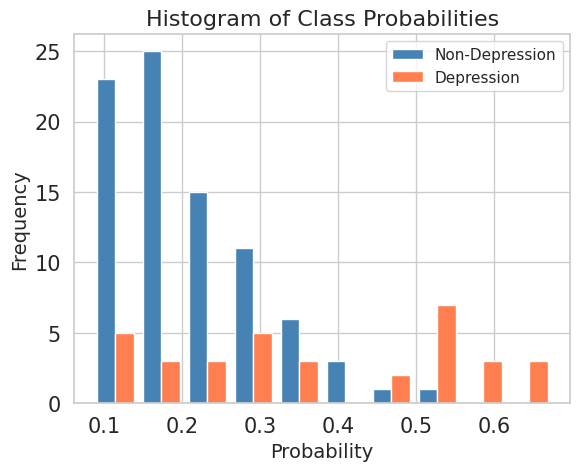

In [33]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

clf = LinearSVC(C=10)

calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid')

calibrated_clf.fit(train_preprocessed, y_train)

y_prob = calibrated_clf.predict_proba(test_preprocessed)

print(classification_report(y_test, calibrated_clf.predict(test_preprocessed)))
print("KL Divergence Score: ", calculate_kl_divergence(y_prob, y_test))
plot_class_probabilities(y_prob, y_test)

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        85
           1       0.84      0.47      0.60        34

    accuracy                           0.82       119
   macro avg       0.83      0.72      0.75       119
weighted avg       0.83      0.82      0.81       119

KL Divergence Score:  0.03241538661640445


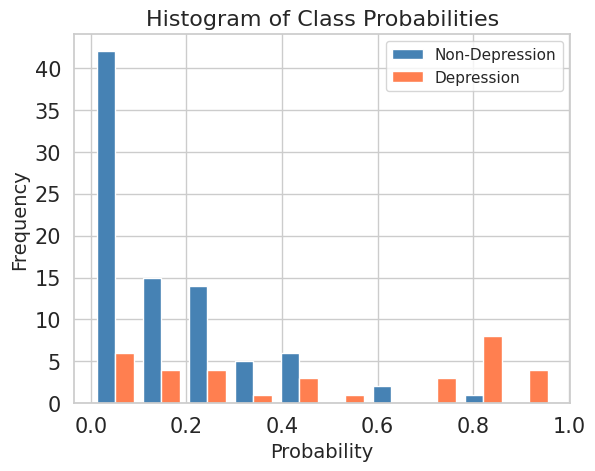

In [34]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(C=100)

clf_lr.fit(train_preprocessed, y_train)

y_prob_lr = clf_lr.predict_proba(test_preprocessed)

print(classification_report(y_test, clf_lr.predict(test_preprocessed)))
print("KL Divergence Score: ", calculate_kl_divergence(y_prob_lr, y_test))
plot_class_probabilities(y_prob_lr, y_test)